# **Softmax Regression with MNIST**

## Imports

In [1]:
import numpy as np
from pprint import pprint

np.random.seed(42)

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score 
from sklearn.metrics import make_scorer 
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns

mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
mpl.rc('figure',figsize=(8,6))


## Data Loading

In [ ]:
X,y =fetch_openml('mnist_784', version=1,return_X_y=True)

In [ ]:
X=X.to_numpy()
y=y.to_numpy()
x_train,x_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

## Model Building

In [ ]:
pipe=Pipeline(steps=[('scaler',StandardScaler()),
                     ('logreg',LogisticRegression(multi_class='multinomial',
                                                  solver='sag'))])
pipe.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(multi_class='multinomial', solver='sag'))])

In [ ]:
pipe[-1].coef_.shape

(10, 784)

In [ ]:
pipe[-1].intercept_.shape

(10,)

In [ ]:
pipe[-1].classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

## Model Evaluation

In [ ]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.87      0.89       892
           6       0.93      0.95      0.94       958
           7       0.92      0.93      0.92      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



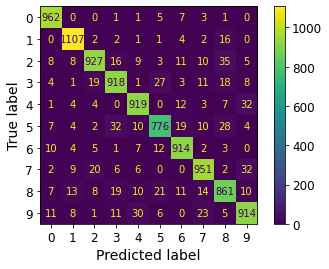

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe,x_test,y_test)

## Using LogisticRegressionCV

In [ ]:
scorer=make_scorer(f1_score, average='micro')
pipe=Pipeline(steps=[('scaler',StandardScaler()),
                     ('logreg',LogisticRegressionCV(
                         cv=5, multi_class='multinomial', solver='sag',
                         scoring=scorer , max_iter=1, random_state=1729
                     ))])
pipe.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

KeyboardInterrupt: ignored

In [ ]:
pipe[-1].C_

In [ ]:
pipe[-1].l1_ratio_

In [ ]:
print(classification_report(y_test, pipe.predict(x_test)))

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe,x_test,y_test)

# **KNN with MNIST**

## Imports

In [ ]:
import numpy as np
from pprint import pprint

np.random.seed(42)

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_validate, RandomizedSearchCV, GridSearchCV, cross_val_predict
from sklearn.model_selection import learning_curve


from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score 
from sklearn.metrics import make_scorer 
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns

mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
mpl.rc('figure',figsize=(8,6))


## Dataset

In [ ]:
X,y=fetch_openml('mnist_784', version=1, return_X_y=True )

In [ ]:
X=X.to_numpy()
y=y.to_numpy()

In [ ]:
x_train,x_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

## Binary Classification

In [ ]:
y_train_0=-1*np.ones((len(y_train)))
y_test_0=-1*np.ones((len(y_test)))

indx_0=np.where(y_train=='0')
y_train_0[indx_0]=1
indx_0=np.where(y_test=='0')
y_test_0[indx_0]=1

In [ ]:
# Data visualization

pipe_pca_2d=make_pipeline(MinMaxScaler(),PCA(n_components=2))
x_train_pca_2d=pipe_pca_2d.fit_transform(x_train)

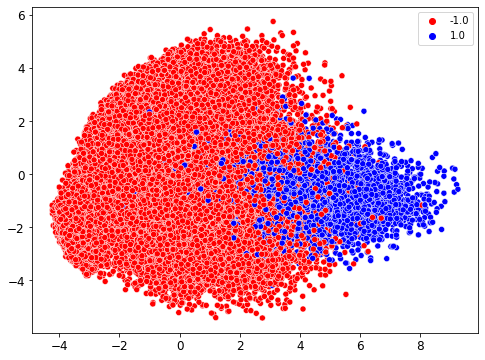

In [ ]:
import matplotlib.colors
cmap=matplotlib.colors.ListedColormap(['r','b'])
plt.figure()
sns.scatterplot(x=x_train_pca_2d[:,0],y=x_train_pca_2d[:,1],hue=y_train_0,palette=cmap)

In [ ]:
pipe_pca_3d=make_pipeline(MinMaxScaler(),PCA(n_components=3))
x_train_pca_3d=pipe_pca_3d.fit_transform(x_train)

In [ ]:
import plotly.express as px
fig=px.scatter_3d(x=x_train_pca_3d[:,0],
               y=x_train_pca_3d[:,1],
               z=x_train_pca_3d[:,2],
               color=y_train_0,
               color_discrete_map=cmap,
               opacity=0.5)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

## KNN Classifier

In [ ]:
pipe_clf_pca_2d=make_pipeline(pipe_pca_2d,KNeighborsClassifier(n_neighbors=3))

In [ ]:
index_neg=np.argsort(y_train_0)[:5]
index_pos=np.argsort(y_train_0)[-1:-6:-1]

In [ ]:
print('Pos_classes: ',y_train_0[index_pos])
print('Neg_classes: ',y_train_0[index_neg])

Pos_classes:  [1. 1. 1. 1. 1.]
Neg_classes:  [-1. -1. -1. -1. -1.]


In [ ]:
x=np.vstack((x_train[index_pos,:], x_train[index_neg,:]))
print(x.shape)
y=np.hstack((y_train_0[index_pos],y_train_0[index_neg]))
print(y.shape)

(10, 784)
(10,)


In [ ]:
pipe_clf_pca_2d.fit(x,y)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                 ('pca', PCA(n_components=2))])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
x_reduced=pipe_clf_pca_2d[0].transform(x)

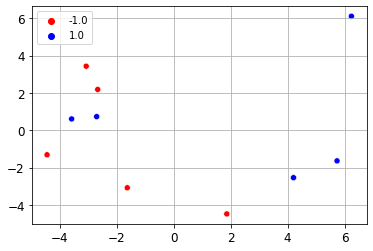

In [ ]:
cmap=matplotlib.colors.ListedColormap(['r','b'])
plt.figure()
sns.scatterplot(x=x_reduced[:,0],y=x_reduced[:,1],marker='o', hue=y,palette=cmap)
plt.grid(True)
plt.show()

Test labels:  [-1. -1. -1.  1. -1. -1. -1. -1. -1. -1.]


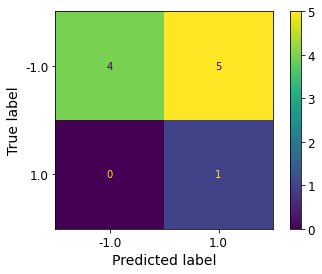

In [ ]:
y_hat_0=pipe_clf_pca_2d.predict(x_test[:10,:])
ConfusionMatrixDisplay.from_predictions(y_test_0[:10],y_hat_0[:10])
print('Test labels: ',y_test_0[:10])
plt.show()

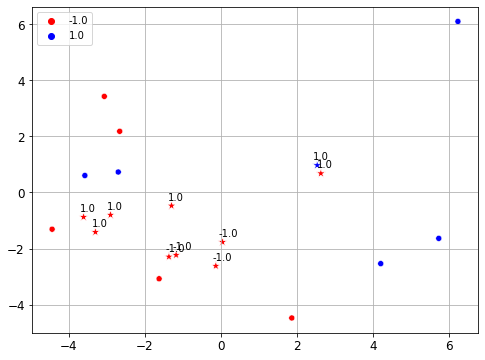

In [ ]:
cmap=matplotlib.colors.ListedColormap(['r','b'])
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_reduced[:,0],y=x_reduced[:,1],marker='o', hue=y,palette=cmap)
plt.grid(True)

x_test_reduced=pipe_clf_pca_2d[0].transform(x_test[:10,:])
sns.scatterplot(x=x_test_reduced[:,0],y=x_test_reduced[:,1],s=100,marker='*',
                hue=y_test_0[:10],palette=cmap,legend=None)

dx,dy=-0.1,0.2
for i in range(10):
  plt.annotate(str(y_hat_0[i]),xy=(x_test_reduced[i,0]+dx,x_test_reduced[i,1]+dy))
plt.grid(True)
plt.show()

In [ ]:
from sklearn.neighbors  import NearestNeighbors
neighbors=NearestNeighbors(n_neighbors=3)
neighbors.fit(pipe_pca_2d.transform(x))

NearestNeighbors(n_neighbors=3)

In [ ]:
dist_neighbors,idx_neighbors=neighbors.kneighbors(pipe_pca_2d.transform(x_test[:10]),
                                                  3,
                                                  return_distance=True)

In [ ]:
import statistics
for i in range(3):
  print('Distance: {0},\nIndex: {1},\nLables: {2},\nPredictions: {3}\n'.format(dist_neighbors[i],
                                                                             idx_neighbors[i],
                                                                             y[idx_neighbors[i].flatten()],
                                                                             statistics.mode(y[idx_neighbors[i].flatten()])))

Distance: [1.54510433 1.56004731 1.61914472],
Index: [1 4 6],
Lables: [ 1.  1. -1.],
Predictions: 1.0

Distance: [0.95703587 3.33077652 3.39001596],
Index: [7 1 6],
Lables: [-1.  1. -1.],
Predictions: -1.0

Distance: [1.14297879 2.0379748  2.22709669],
Index: [6 4 1],
Lables: [-1.  1.  1.],
Predictions: 1.0



In [ ]:
pipe_clf_pca_2d.fit(x_train[:10000],y_train_0[:10000])

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                 ('pca', PCA(n_components=2))])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

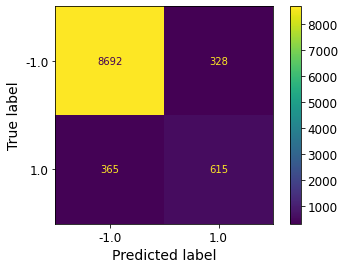

In [ ]:
y_hat_0=pipe_clf_pca_2d.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test_0,y_hat_0)

In [ ]:
print(classification_report(y_test_0,y_hat_0))

              precision    recall  f1-score   support

        -1.0       0.96      0.96      0.96      9020
         1.0       0.65      0.63      0.64       980

    accuracy                           0.93     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.93      0.93      0.93     10000



In [ ]:
from sklearn.metrics import precision_score
precisions=[]
for k in range(1,20,2):
  pipe_clf_pca_2d.__n_neighbors=k
  pipe_clf_pca_2d.fit(x_train[:10000],y_train_0[:10000])
  y_hat_0=pipe_clf_pca_2d.predict(x_test)
  precisions.append(precision_score(y_test_0, y_hat_0))

([<matplotlib.axis.XTick at 0x7f7316ef0250>,
 [Text(0, 0, '1'),
  Text(0, 0, '3'),
  Text(0, 0, '5'),
  Text(0, 0, '7'),
  Text(0, 0, '9'),
  Text(0, 0, '11'),
  Text(0, 0, '13'),
  Text(0, 0, '15'),
  Text(0, 0, '17'),
  Text(0, 0, '19')])

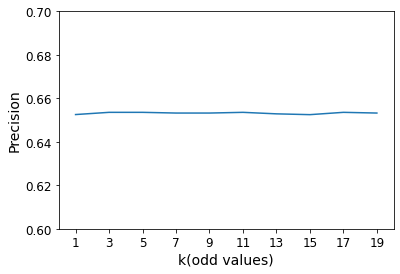

In [ ]:
plt.figure()
plt.plot(np.arange(1,20,2),precisions)
plt.xlim((0,20))
plt.ylim((0.6,0.7))
plt.xlabel('k(odd values)')
plt.ylabel('Precision')
plt.xticks(ticks=np.arange(1,20,2),labels=np.arange(1,20,2))


In [ ]:
# without pca

pipe_knn=make_pipeline(MinMaxScaler(),
                       KNeighborsClassifier(n_neighbors=1))

grid_k={'kneighborsclassifier__n_neighbors':[1,3,5,7,9,11]}
cv=GridSearchCV(pipe_knn,param_grid=grid_k,scoring='precision',cv=5)
cv.fit(x_train,y_train_0)
print(cv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=1))]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 3, 5, 7, 9,
                                                               11]},
             scoring='precision')


In [ ]:
print(cv.cv_results_)

In [ ]:
pipe_knn=make_pipeline(MinMaxScaler(),
                       KNeighborsClassifier(n_neighbors=7))


In [ ]:
y_hat_0=pipe_knn.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test_0,y_hat_0)

In [ ]:
# multiclass
print(pipe_knn)

In [ ]:
pipe_knn.fit(x_train,y_train)
y_hat=pipe_knn.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

In [ ]:
pipe_knn.classses_

In [ ]:
print(classification_report(y_test,y_hat))

# **KNN with California Housing Dataset**

## Imports

In [ ]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Training

In [ ]:
X,y=fetch_california_housing(return_X_y=True)

In [ ]:
X.shape

(20640, 8)

In [ ]:
y.shape

(20640,)

In [ ]:
assert (X.shape[0]==y.shape[0])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=8)

In [ ]:
assert (X_train.shape[0]==y_train.shape[0])

In [ ]:
assert(X_test.shape[0]==y_test.shape[0])

## Preprocessing

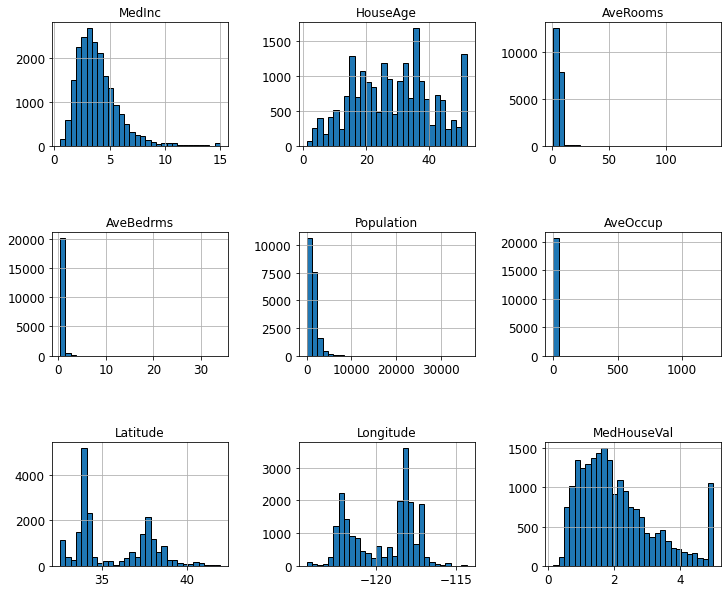

In [ ]:
california_housing=fetch_california_housing(as_frame=True)
california_housing.frame.hist(figsize=(12,10),bins=30,edgecolor='black')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

## Model Building

In [ ]:
pipe=Pipeline([('scaler',MinMaxScaler()),
               ('knn',KNeighborsRegressor(n_neighbors=2))])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
error=mean_squared_error(y_test,y_pred, squared=False)
print(error)

0.6767822465759739


## Model selection and Evaluation

Manual HPT with Cross validation

In [ ]:
rmse_val=[]

for K in range(1,31):
  pipe=Pipeline([('scaler',MinMaxScaler()),
                 ('knn',KNeighborsRegressor(n_neighbors=K))])
  pipe.fit(X_train,y_train)
  pred=pipe.predict(X_test)
  error=mean_squared_error(y_test,pred,squared=False)
  rmse_val.append(error)

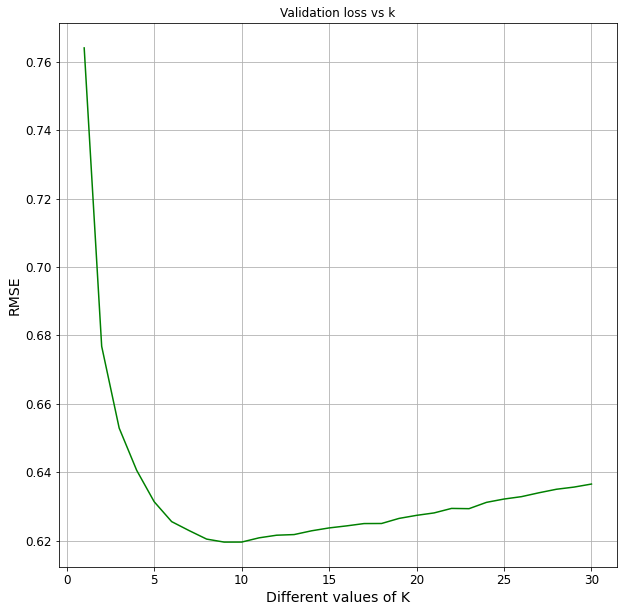

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(1, len(rmse_val)+1),rmse_val, color='green')
plt.xlabel('Different values of K')
plt.ylabel('RMSE')
plt.grid(True)
plt.title('Validation loss vs k')
plt.show()

In [ ]:
print('Lowest RMSE val is at k={0}'.format(np.argmin(rmse_val)+1))

Lowest RMSE val is at k=9


HPT with gridsearchcv

In [ ]:
param_grid={'knn__n_neighbors':list(range(1,31))}
print(param_grid)

pipe=Pipeline([('scaler',MinMaxScaler()),
               ('knn',KNeighborsRegressor())])

gs=GridSearchCV(estimator=pipe,
                param_grid=param_grid,
                cv=10,
                n_jobs=-1,
                return_train_score=True)
gs.fit(X_train,y_train)

reg_knn=gs.best_estimator_

{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [ ]:
reg_knn

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=6))])

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=6))])

In [ ]:
pred=gs.best_estimator_.predict(X_test)
error=mean_squared_error(y_test,pred,squared=False)
print('RMSE value for k is: ',error)

RMSE value for k is:  0.6255268557053962


HPT with randomizedsearchcv

In [ ]:
param_grid={'knn__n_neighbors':list(range(1,31))}
print(param_grid)

pipe_rscv=Pipeline([('scaler',MinMaxScaler()),
               ('knn',KNeighborsRegressor())])

rscv=RandomizedSearchCV (estimator=pipe_rscv,
                param_distributions=param_grid,
                cv=10,
                n_jobs=-1,
                return_train_score=True)
rscv.fit(X_train,y_train)

reg_knn_rscv=rscv.best_estimator_
print(reg_knn_rscv)

{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=8))])


In [ ]:
pred_rscv=rscv.best_estimator_.predict(X_test)
error_rscv=mean_squared_error(y_test,pred_rscv,squared=False)
print('RMSE value for k is: ',error_rscv)

RMSE value for k is:  0.6204175761575943


Polynomial Features

In [ ]:
params={'poly__degree':list(range(1,4)),
        'knn__n_neighbors':list(range(1,31))}
print(params) 
pipe=Pipeline(steps=[('poly',PolynomialFeatures()),
                     ('scaler',MinMaxScaler()),
                     ('knn',KNeighborsRegressor())])
gs=GridSearchCV(estimator=pipe,
                param_grid=params,
                cv=10,
                n_jobs=-1)

gs.fit(X_train,y_train)
reg_knn=gs.best_estimator_
print('\n',reg_knn)

{'poly__degree': [1, 2, 3], 'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.




 Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=6))])


In [ ]:
pred=gs.best_estimator_.predict(X_test)
error=mean_squared_error(y_test,pred,squared=False)
print('RMSE value for k is: ',error)

RMSE value for k is:  0.6255268557053962


In [ ]:
# @title Practice problem

x=np.array([[1000,0.5],[2000,0.6],[1500,0.3],[990,1.0],[5400,0.7]])
y=np.array([[11],[20],[42],[16],[25]])

pipe=Pipeline(steps=[('scaler',MinMaxScaler()),
                     ('knn',KNeighborsRegressor(n_neighbors=3,
                                                metric='euclidean'))])
pipe.fit(x,y)
pipe.predict(np.array([[1700,0.2]]))

array([[24.33333333]])

# **Large Scale Machine Learning**

## **Incremental Learning**

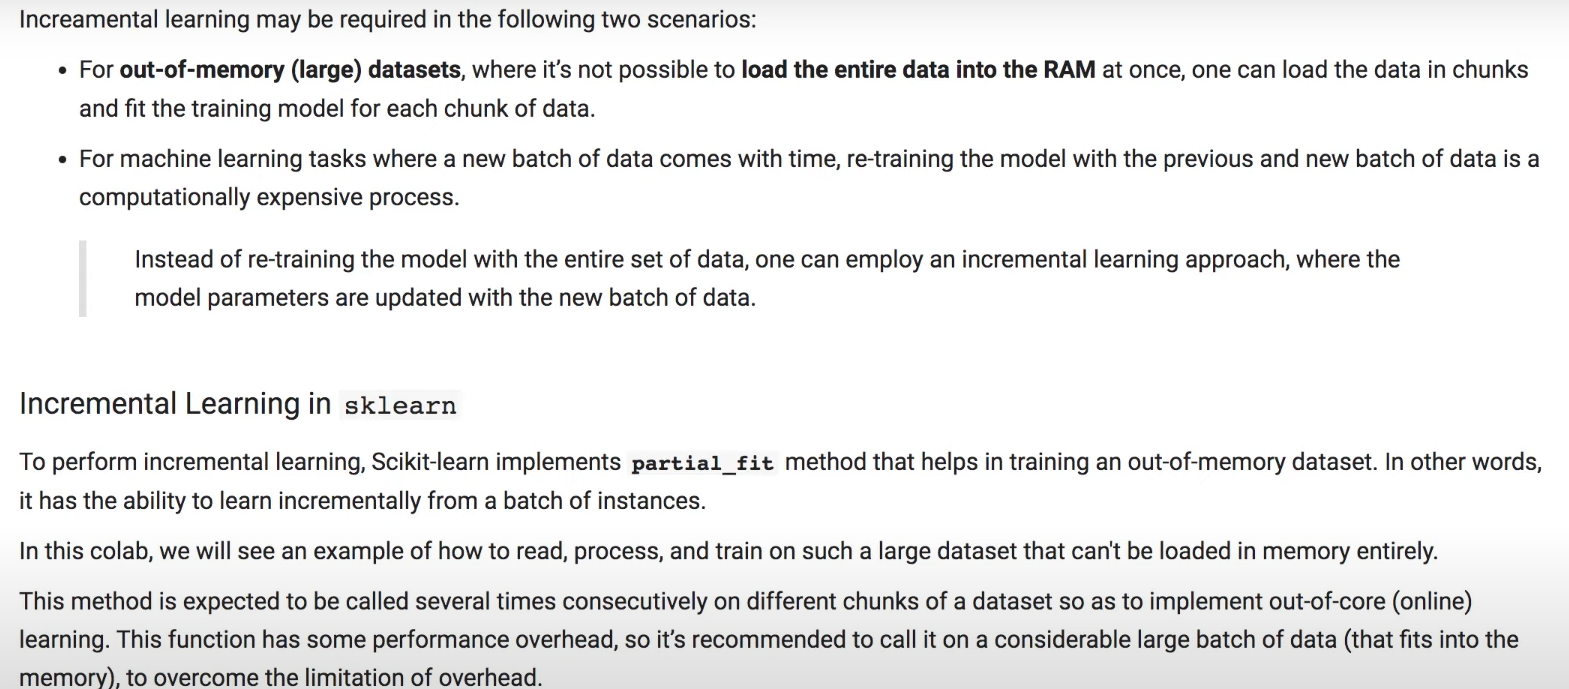

## **Partial_fit() attributes**

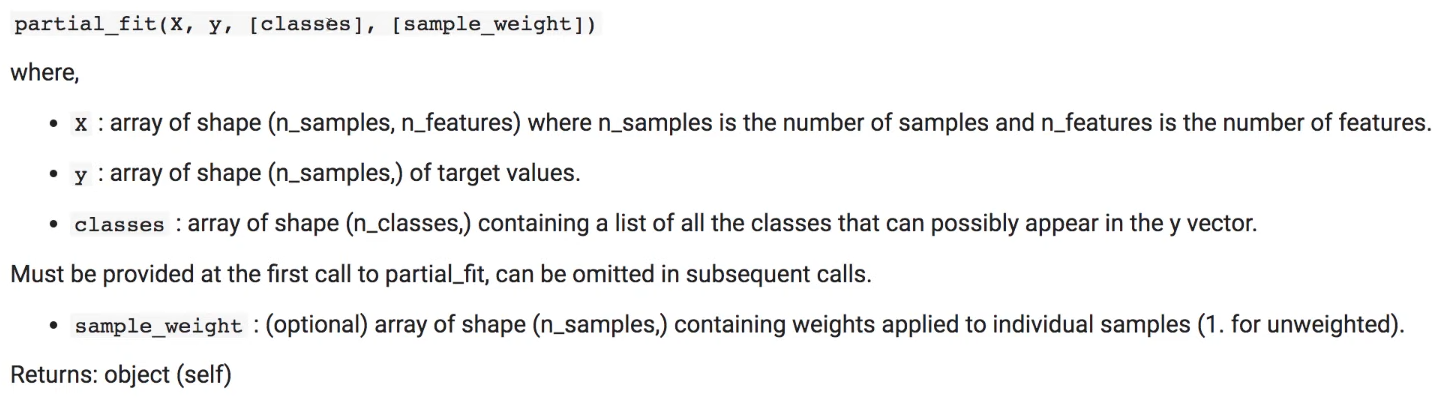
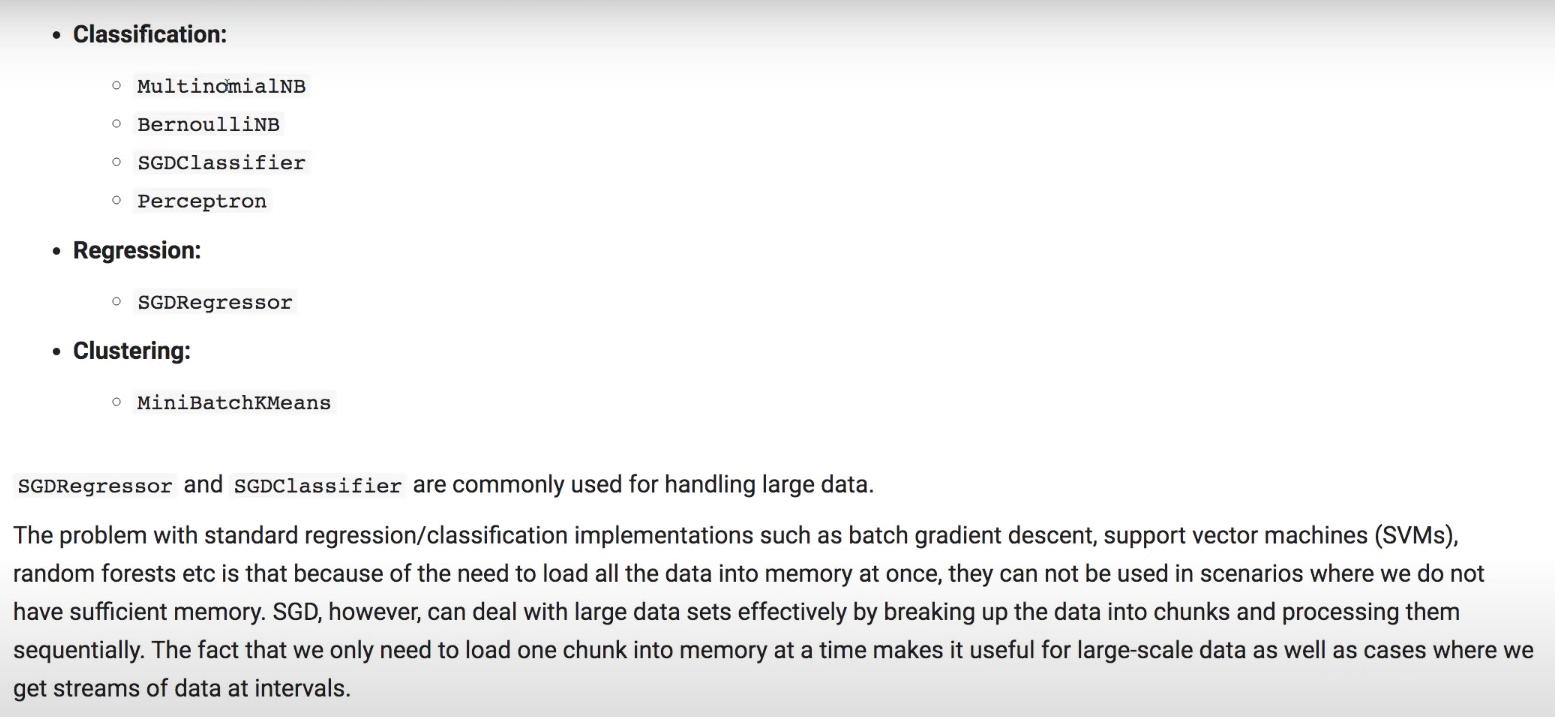

## **fit() vs partial_fit()**

In [1]:
# Importing liabraries

from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Traditional approach using fit()

In [2]:
x,y=make_classification(n_samples=50000,
                        n_features=10,
                        n_classes=3,
                        n_clusters_per_class=1)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15)

In [4]:
clf1=SGDClassifier(max_iter=1000,
                   tol=0.01)
clf1.fit(xtrain,ytrain)

SGDClassifier(tol=0.01)

In [5]:
train_score=clf1.score(xtrain,ytrain)
train_score

0.8750823529411764

In [6]:
test_score=clf1.score(xtest,ytest)
test_score

0.8793333333333333

In [7]:
ypred=clf1.predict(xtest)
cm=confusion_matrix(ytest,ypred)
print(cm)

[[2039  406    4]
 [  11 2079  417]
 [  54   13 2477]]


In [8]:
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      2449
           1       0.83      0.83      0.83      2507
           2       0.85      0.97      0.91      2544

    accuracy                           0.88      7500
   macro avg       0.89      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500



### Using partial_fit() method

In [9]:
xtrain[0:5]

array([[-7.37152709e-01,  9.87321427e-01, -6.86994753e-01,
        -9.01065289e-01, -4.23393914e-01,  1.20688373e-01,
         3.69373947e-01, -1.16257045e-01,  2.52045903e-01,
        -1.23998345e+00],
       [-3.32956532e-02, -7.46237134e-01,  6.99626274e-02,
        -3.71186504e-02, -1.43053730e+00, -4.22939681e-01,
        -2.87320261e-01,  7.83496181e-01, -5.42091590e-01,
         7.28624450e-01],
       [-9.45648626e-01,  5.55020050e-02, -2.89119695e-01,
        -1.14518096e+00, -1.91219217e-01, -1.13027964e+00,
        -4.98146241e-01, -2.13031841e-01, -1.33700393e+00,
         5.95265232e-01],
       [ 5.39780589e-01, -2.44629267e-01, -1.10048694e-03,
         6.63695214e-01, -2.35768096e-01, -5.53726230e-01,
         1.27077267e+00,  4.27538942e-01, -7.85790148e-01,
         5.25598011e-02],
       [ 1.71787381e+00,  8.89331367e-01, -3.12155479e-01,
         2.10367222e+00,  1.76387423e+00, -7.37524830e-01,
        -2.61236990e-01,  4.76241834e-01, -1.17686832e+00,
        -1.

In [10]:
ytrain[0:5]

array([2, 1, 2, 1, 1])

In [11]:
import numpy as np

In [12]:
train_data=np.concatenate((xtrain,ytrain[:,np.newaxis]),axis=1)

In [13]:
train_data[:5]

array([[-7.37152709e-01,  9.87321427e-01, -6.86994753e-01,
        -9.01065289e-01, -4.23393914e-01,  1.20688373e-01,
         3.69373947e-01, -1.16257045e-01,  2.52045903e-01,
        -1.23998345e+00,  2.00000000e+00],
       [-3.32956532e-02, -7.46237134e-01,  6.99626274e-02,
        -3.71186504e-02, -1.43053730e+00, -4.22939681e-01,
        -2.87320261e-01,  7.83496181e-01, -5.42091590e-01,
         7.28624450e-01,  1.00000000e+00],
       [-9.45648626e-01,  5.55020050e-02, -2.89119695e-01,
        -1.14518096e+00, -1.91219217e-01, -1.13027964e+00,
        -4.98146241e-01, -2.13031841e-01, -1.33700393e+00,
         5.95265232e-01,  2.00000000e+00],
       [ 5.39780589e-01, -2.44629267e-01, -1.10048694e-03,
         6.63695214e-01, -2.35768096e-01, -5.53726230e-01,
         1.27077267e+00,  4.27538942e-01, -7.85790148e-01,
         5.25598011e-02,  1.00000000e+00],
       [ 1.71787381e+00,  8.89331367e-01, -3.12155479e-01,
         2.10367222e+00,  1.76387423e+00, -7.37524830e-01,
  

In [14]:
a=np.asarray(train_data)
np.savetxt('train_data.csv',a,delimiter=',')

In [15]:
clf2=SGDClassifier(max_iter=100,tol=0.01)

Processing data chunk by chunk

In [17]:
import pandas as pd 
chunksize=1000
iter=1
for train_df in pd.read_csv('train_data.csv',chunksize=chunksize,
                            iterator=True):
  if iter==1:
    xtrain_partial=train_df.iloc[:,0:10]
    ytrain_partial=train_df.iloc[:,10]
    clf2.partial_fit(xtrain_partial,ytrain_partial,
                     classes=np.array([0,1,2]))
  else:
    xtrain_partial=train_df.iloc[:,0:10]
    ytrain_partial=train_df.iloc[:,10]
    clf2.partial_fit(xtrain_partial,ytrain_partial)

  print('After iter #',iter)
  print(clf2.coef_)
  print(clf2.intercept_,'\n')
  iter=iter+1

After iter # 1
[[ 1.15525573 -0.76522786 -0.15442857  1.40003544 -0.23960459  1.2587561
  -0.55130486 -0.01690665  1.47566314  0.09218838]
 [ 1.65174082  0.33291311  0.57033596  2.02725104 -0.12122151 -1.25516777
   0.24192887 -0.38209398 -1.8370337   0.26676162]
 [-3.01681899 -0.28074489  0.47464698 -3.67992484 -0.07111252 -0.42866277
   0.48500209 -0.62081448 -0.16046165 -0.12865718]]
[-1.18843545 -2.83590701 -2.88228578] 

After iter # 2
[[ 0.30832374  0.06255563 -0.24908933  0.36258574 -0.03199548  1.65999832
  -0.24203796  0.82158687  2.1044955   0.7395046 ]
 [ 1.30242581  0.07391672 -0.6806175   1.60451187 -1.51623179 -1.70636062
   0.06171979  0.07933044 -2.37442203  0.37397651]
 [-2.95676008 -0.4125031   0.07045355 -3.61029659  0.5551662   0.01438604
   0.37745573 -0.10194775  0.40412102 -0.06118832]]
[-0.96589313 -1.3041131  -2.4393943 ] 

After iter # 3
[[ 0.46771323 -0.12443553  0.33555355  0.55799325  0.14304839  1.56494929
  -0.35778258  0.18292996  1.96091035  0.07802024]

In [18]:
test_score=clf2.score(xtest,ytest)
test_score

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.8733333333333333

In [19]:
ypred=clf2.predict(xtest)
cm=confusion_matrix(ytest,ypred)
print(cm)

[[2083  362    4]
 [  32 2088  387]
 [ 132   33 2379]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [20]:
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      2449
           1       0.84      0.83      0.84      2507
           2       0.86      0.94      0.90      2544

    accuracy                           0.87      7500
   macro avg       0.88      0.87      0.87      7500
weighted avg       0.88      0.87      0.87      7500



## **Incremental Preprocessing Example**

### `CountVectorizer` vs `HashingVectorizer`

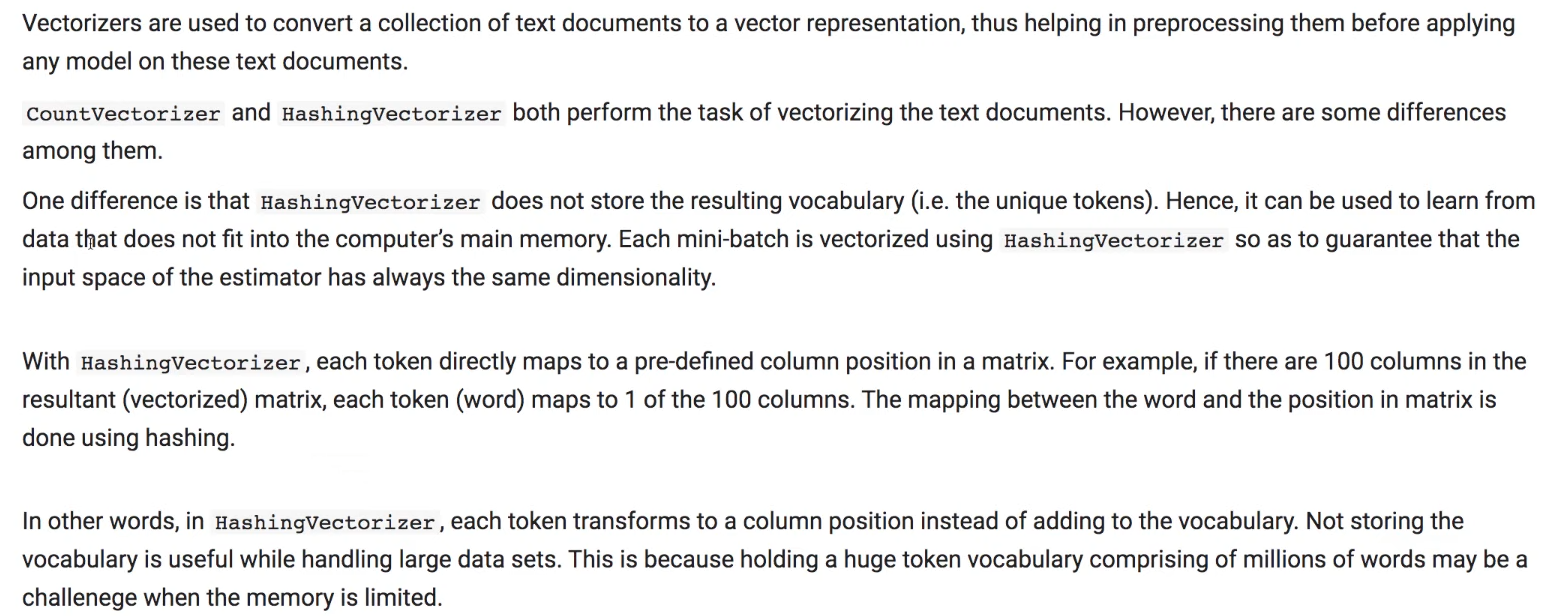

In [21]:
text_document=["Growing up, we've all heard the famous proverb, 'an apple a day keeps the doctor away'. The proverb actually started in Wales, where it originally went like, Eat an apple before going to bed, and you’ll keep the doctor from earning his bread. Communities all across the world have known about the benefits of eating apples, from the Ancient Romans, the Anglo Saxons, and various groups in Southern Asia who practiced Ayurveda. Since apples don't have a lot of calories, and they hold high quantities of water and fiber, they're good options for those who are considering going on a diet. They make optimal snacks, and can also be a part of fruit bowls and salads. It's always a good choice to have a variety of fruits in your diet, as that positively affects your digestion and your metabolism rate. Here's a list of apple quotations for your amusement!"]

In [22]:
text_document

["Growing up, we've all heard the famous proverb, 'an apple a day keeps the doctor away'. The proverb actually started in Wales, where it originally went like, Eat an apple before going to bed, and you’ll keep the doctor from earning his bread. Communities all across the world have known about the benefits of eating apples, from the Ancient Romans, the Anglo Saxons, and various groups in Southern Asia who practiced Ayurveda. Since apples don't have a lot of calories, and they hold high quantities of water and fiber, they're good options for those who are considering going on a diet. They make optimal snacks, and can also be a part of fruit bowls and salads. It's always a good choice to have a variety of fruits in your diet, as that positively affects your digestion and your metabolism rate. Here's a list of apple quotations for your amusement!"]

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
c_vectorizer=CountVectorizer()


In [24]:
X_c=c_vectorizer.fit_transform(text_document)

In [25]:
X_c.shape

(1, 103)

In [26]:
c_vectorizer.vocabulary_

{'about': 0,
 'across': 1,
 'actually': 2,
 'affects': 3,
 'all': 4,
 'also': 5,
 'always': 6,
 'amusement': 7,
 'an': 8,
 'ancient': 9,
 'and': 10,
 'anglo': 11,
 'apple': 12,
 'apples': 13,
 'are': 14,
 'as': 15,
 'asia': 16,
 'away': 17,
 'ayurveda': 18,
 'be': 19,
 'bed': 20,
 'before': 21,
 'benefits': 22,
 'bowls': 23,
 'bread': 24,
 'calories': 25,
 'can': 26,
 'choice': 27,
 'communities': 28,
 'considering': 29,
 'day': 30,
 'diet': 31,
 'digestion': 32,
 'doctor': 33,
 'don': 34,
 'earning': 35,
 'eat': 36,
 'eating': 37,
 'famous': 38,
 'fiber': 39,
 'for': 40,
 'from': 41,
 'fruit': 42,
 'fruits': 43,
 'going': 44,
 'good': 45,
 'groups': 46,
 'growing': 47,
 'have': 48,
 'heard': 49,
 'here': 50,
 'high': 51,
 'his': 52,
 'hold': 53,
 'in': 54,
 'it': 55,
 'keep': 56,
 'keeps': 57,
 'known': 58,
 'like': 59,
 'list': 60,
 'll': 61,
 'lot': 62,
 'make': 63,
 'metabolism': 64,
 'of': 65,
 'on': 66,
 'optimal': 67,
 'options': 68,
 'originally': 69,
 'part': 70,
 'positively'

In [27]:
print(X_c)

  (0, 47)	1
  (0, 90)	1
  (0, 96)	1
  (0, 93)	1
  (0, 4)	2
  (0, 49)	1
  (0, 86)	8
  (0, 38)	1
  (0, 73)	2
  (0, 8)	2
  (0, 12)	3
  (0, 30)	1
  (0, 57)	1
  (0, 33)	2
  (0, 17)	1
  (0, 2)	1
  (0, 84)	1
  (0, 54)	3
  (0, 94)	1
  (0, 98)	1
  (0, 55)	2
  (0, 69)	1
  (0, 97)	1
  (0, 59)	1
  (0, 36)	1
  :	:
  (0, 67)	1
  (0, 82)	1
  (0, 26)	1
  (0, 5)	1
  (0, 19)	1
  (0, 70)	1
  (0, 42)	1
  (0, 23)	1
  (0, 79)	1
  (0, 6)	1
  (0, 27)	1
  (0, 91)	1
  (0, 43)	1
  (0, 102)	4
  (0, 15)	1
  (0, 85)	1
  (0, 71)	1
  (0, 3)	1
  (0, 32)	1
  (0, 64)	1
  (0, 76)	1
  (0, 50)	1
  (0, 60)	1
  (0, 75)	1
  (0, 7)	1


Hashing vectorizer

In [28]:
from sklearn.feature_extraction.text import HashingVectorizer
h_vectorizer=HashingVectorizer(n_features=50)


In [29]:
X_h=h_vectorizer.fit_transform(text_document)

In [30]:
X_h.shape

(1, 50)

In [31]:
print(X_h[0])

  (0, 0)	0.11094003924504582
  (0, 1)	0.16641005886756874
  (0, 2)	-0.05547001962252291
  (0, 3)	0.05547001962252291
  (0, 4)	-0.05547001962252291
  (0, 5)	0.05547001962252291
  (0, 6)	0.05547001962252291
  (0, 7)	0.05547001962252291
  (0, 8)	-0.3882901373576604
  (0, 9)	-0.11094003924504582
  (0, 10)	-0.11094003924504582
  (0, 11)	-0.11094003924504582
  (0, 12)	-0.05547001962252291
  (0, 13)	0.05547001962252291
  (0, 15)	0.05547001962252291
  (0, 18)	0.05547001962252291
  (0, 19)	-0.16641005886756874
  (0, 20)	0.11094003924504582
  (0, 21)	0.0
  (0, 22)	0.05547001962252291
  (0, 23)	0.05547001962252291
  (0, 24)	0.05547001962252291
  (0, 26)	0.0
  (0, 28)	0.0
  (0, 29)	0.2773500981126146
  (0, 30)	-0.16641005886756874
  (0, 33)	0.05547001962252291
  (0, 34)	-0.16641005886756874
  (0, 35)	0.05547001962252291
  (0, 36)	0.05547001962252291
  (0, 37)	-0.11094003924504582
  (0, 38)	0.05547001962252291
  (0, 39)	0.16641005886756874
  (0, 40)	0.05547001962252291
  (0, 41)	0.22188007849009164

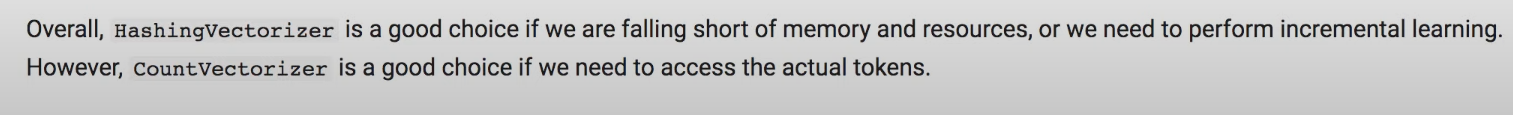

## **Combining preprocessing & fitting incremental Learning**

In [35]:
import pandas as pd 
from io import StringIO,BytesIO, TextIOWrapper
from zipfile import ZipFile
import urllib.request

resp=urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip')
zipfile=ZipFile(BytesIO(resp.read()))

data=TextIOWrapper(zipfile.open('sentiment labelled sentences/amazon_cells_labelled.txt'),encoding='utf-8')

df=pd.read_csv(data,sep='\t') 
df.columns=['review','sentiment']

In [37]:
df.head()

,review,sentiment
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     999 non-null    object
 1   sentiment  999 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [39]:
df.describe()

,sentiment
count,999.000000
mean,0.500501
std,0.500250
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [40]:
df.loc[:,'sentiment'].unique()

array([1, 0])

In [42]:
X=df.loc[:,'review']
y=df.loc[:,'sentiment']

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [44]:
X_train.shape

(799,)

In [45]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer=HashingVectorizer()

In [46]:
from sklearn.linear_model import SGDClassifier
classifier=SGDClassifier(penalty='l2',loss='hinge')

In [47]:
x_train_part1_hashed=vectorizer.fit_transform(X_train[0:400])
y_train_part1=y_train[0:400]

In [50]:
all_classes=np.unique(df.loc[:, 'sentiment'])

In [52]:
classifier.partial_fit(x_train_part1_hashed, y_train_part1, classes=all_classes)  

SGDClassifier()

In [53]:
x_test_hashed=vectorizer.transform(X_test)

In [54]:
test_score=classifier.score(x_test_hashed,y_test)
test_score

0.725

In [55]:
# part 2

x_train_part2_hashed=vectorizer.fit_transform(X_train[400:])
y_train_part2=y_train[400:]


In [56]:
classifier.partial_fit(x_train_part2_hashed,y_train_part2)

SGDClassifier()

In [57]:
test_score=classifier.score(x_test_hashed,y_test)

In [58]:
test_score

0.745

# **Practice Assignment 7 - Not Graded**

In [63]:
text_data=['This is the first question.', 'This document is the second document.', 'And this is the third one' ]


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X_c=cv.fit_transform(text_data)
X_c.shape

(3, 10)

In [66]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(X_c)
le.transform(X_c)

ValueError: ignored

# **Graded Assignment**

In [1]:
import pandas as pd
df=pd.read_csv('/content/data_for_large_scale.csv')

In [2]:
df

,Feature-1,Feature-2,Feature-3,Feature-4,Feature-5,Feature-6,Feature-7,Feature-8,Feature-9,Feature-10,Target
0,-1.580,1.0500,1.060,-0.4400,0.451,-0.0348,0.643,0.2650,0.2680,-0.851,84.7
1,-0.832,-0.8660,-1.340,0.1380,1.180,0.7330,-1.410,0.1350,-0.0880,-1.550,-211.0
2,-0.237,2.0900,-3.930,0.2960,0.352,-0.5010,0.961,-0.0287,1.8200,0.938,-96.9
3,-1.170,-1.1300,-1.090,1.1200,0.312,0.1830,0.448,-0.8190,-1.0100,-1.080,-152.0
4,0.260,-0.0273,0.925,-1.1500,-1.390,0.0251,0.627,0.0950,-0.2800,-0.848,-57.7
...,...,...,...,...,...,...,...,...,...,...,...
39752,-0.624,-0.3830,-1.140,1.5800,1.190,-0.5850,0.651,-1.7400,0.9940,-0.542,-21.5
39753,-0.790,-0.2920,1.520,-0.0510,0.147,0.3580,0.237,-0.6090,0.1210,0.461,124.0
39754,1.510,1.5600,1.840,1.2100,-1.150,-0.1410,1.060,1.7800,-0.0471,-1.110,372.0
39755,0.180,-0.1010,1.690,0.1720,0.182,-0.5110,-0.457,-0.3420,0.3450,0.247,90.3


In [3]:
df.shape

(39757, 11)

In [4]:
X=df.drop(['Target'], axis=1)

In [5]:
X

,Feature-1,Feature-2,Feature-3,Feature-4,Feature-5,Feature-6,Feature-7,Feature-8,Feature-9,Feature-10
0,-1.580,1.0500,1.060,-0.4400,0.451,-0.0348,0.643,0.2650,0.2680,-0.851
1,-0.832,-0.8660,-1.340,0.1380,1.180,0.7330,-1.410,0.1350,-0.0880,-1.550
2,-0.237,2.0900,-3.930,0.2960,0.352,-0.5010,0.961,-0.0287,1.8200,0.938
3,-1.170,-1.1300,-1.090,1.1200,0.312,0.1830,0.448,-0.8190,-1.0100,-1.080
4,0.260,-0.0273,0.925,-1.1500,-1.390,0.0251,0.627,0.0950,-0.2800,-0.848
...,...,...,...,...,...,...,...,...,...,...
39752,-0.624,-0.3830,-1.140,1.5800,1.190,-0.5850,0.651,-1.7400,0.9940,-0.542
39753,-0.790,-0.2920,1.520,-0.0510,0.147,0.3580,0.237,-0.6090,0.1210,0.461
39754,1.510,1.5600,1.840,1.2100,-1.150,-0.1410,1.060,1.7800,-0.0471,-1.110
39755,0.180,-0.1010,1.690,0.1720,0.182,-0.5110,-0.457,-0.3420,0.3450,0.247


In [6]:
y=df.drop(['Feature-1','Feature-2','Feature-3','Feature-4','Feature-5',
           'Feature-6','Feature-7','Feature-8','Feature-9','Feature-10'],axis=1)

In [7]:
y

,Target
0,84.7
1,-211.0
2,-96.9
3,-152.0
4,-57.7
...,...
39752,-21.5
39753,124.0
39754,372.0
39755,90.3


In [8]:
print(X.shape)
print(y.shape)

(39757, 10)
(39757, 1)


In [9]:
X=X.to_numpy()
y=y.to_numpy()

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.7,random_state=10)

In [11]:
xtrain

array([[-0.16  ,  1.12  , -0.472 , ...,  0.978 , -1.79  ,  0.193 ],
       [ 1.46  , -0.496 , -0.411 , ..., -0.667 , -0.978 , -1.2   ],
       [ 1.13  , -0.559 , -0.758 , ...,  1.26  , -0.26  ,  0.126 ],
       ...,
       [ 0.723 ,  0.218 , -0.537 , ...,  0.0162, -0.323 , -2.07  ],
       [ 0.936 , -0.192 , -0.59  , ...,  1.98  ,  0.455 , -1.03  ],
       [-0.403 ,  0.512 ,  0.775 , ...,  0.122 ,  1.52  ,  0.0726]])

In [30]:
xtrain.shape

(27829, 10)

In [13]:
ytrain.shape

(27829, 1)

In [14]:
xtest.shape

(11928, 10)

In [15]:
ytest.shape

(11928, 1)

In [29]:
xtrain.reshape(-1,90,9)

ValueError: ignored

In [16]:
from sklearn.linear_model import SGDClassifier
clf2=SGDClassifier(random_state=10)

In [25]:
import numpy as np
data = np.array([
	[0.1, 1.0],
	[0.2, 0.9],
	[0.3, 0.8],
	[0.4, 0.7],
	[0.5, 0.6],
	[0.6, 0.5],
	[0.7, 0.4],
	[0.8, 0.3],
	[0.9, 0.2],
	[1.0, 0.1]])
data = data.reshape(1, 10, 2)
print(data.shape)
print(data)

(1, 10, 2)
[[[0.1 1. ]
  [0.2 0.9]
  [0.3 0.8]
  [0.4 0.7]
  [0.5 0.6]
  [0.6 0.5]
  [0.7 0.4]
  [0.8 0.3]
  [0.9 0.2]
  [1.  0.1]]]


In [47]:
import pandas as pd 
chunksize=90
iter=1
for train_df in pd.read_csv('train_data.csv',chunksize=chunksize,
                            iterator=True):
  if iter==1:
    xtrain_partial=train_df.iloc[:,0:10]
    ytrain_partial=train_df.iloc[:,10]
    clf2.partial_fit(xtrain_partial,ytrain_partial,
                     classes=np.array([0,1,2]))
  else:
    xtrain_partial=train_df.iloc[:,0:10]
    ytrain_partial=train_df.iloc[:,10]
    clf2.partial_fit(xtrain_partial,ytrain_partial)

  print('After iter #',iter)
  print('Coef: ',clf2.coef_)
  print('Intercept: ',clf2.intercept_,'\n')
  iter=iter+1

ValueError: ignored

In [17]:
df2=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00246/3D_spatial_network.txt',chunksize=20000,
                            iterator=True)

In [18]:
df2